# Final Assignment for Applied Data Science

### Intoduction

In our days there is a trend to travel overseas to enjoy new food, as a food 
enthusiastic I would like to know if a certain city has similar cuisines as in
my country. Usually this requires me to go and search the web for restaurants in the 
country that i'm traveling to.
I will try to tackle the problem using the Foursquare data to figure the similarity
in cuisines between two cities.



### Data

The data that i will get from the API will give me the restaurants in the area 
that i'm looking to travel.  
For each of the restaurants i will extract the followings:
1. Category
2. Location
3. Name 

I will target the base city as Toronto and will check how similar the Chicago city.

In [7]:
import requests
C_ID = ""
C_SEC = ""
V = "20180323"
LIMIT = 0
PREFIX = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}".format(C_ID, C_SEC, V)

query = "restaurants"
PREFIX = PREFIX + "&query={}&limit={}".format(query, LIMIT)
base_city = "Toronto, CA"
similar_to = ["Chicago, IL"]

In [8]:
def get_response(query):
    response = requests.get(query)
    response.raise_for_status()
    data = response.json()
    res = data['response']
    return res

Let's get the restaurants from the API

In [ ]:
place = base_city
new_query = PREFIX
new_query += "&near={}".format(place)
res = get_response(new_query)

iterating over the restaurants we got and extract the data we stated before

In [ ]:
# getting the latitude and longitude of the city
center_of_city = res['geocode']['center']
items = res['groups'][0]['items']

lats = []
lngs= []
names = []
categories = []

for item in items:
    venue = item['venue']
    lats.append(venue['location']['lat'])
    lngs.append(venue['location']['lng'])
    names.append(venue['name'])
    categories.append(venue['categories'][0]['shortName'])

df = pd.DataFrame({
    "Name": names,
    "Category": categories,
    "Latitude": lats,
    "Longitude": lngs
})
df.to_csv(place.split(",")[0] + ".csv")

Using this table i will see the percentage of each category in this area (the range will be 0-1).

Now we have saved the dataframes into CSV files.

## Methodology

In this project we will try to determine whether a certian city has similar cuisines to another.  
Since there are a lot of countries we will try to determine the similarity between Toronto, CA and Chicago, IL.

In the previous section we have collected the necessary data and saved into csv files.

The next section will focus on analyzing and adjusting the tables to include relevant indicators.

In the last section we will try to implement a machine learning algorithm in order to find the similarity
between two cities, i will take into account the frequncy of the cuisine in the area and will try to cluster 

Let's take a look at the Chicago venues

In [35]:
df = pd.read_csv('Chicago.csv')[['Name', 'Category', 'Latitude', 'Longitude']]
values_cout = df['Category'].value_counts()
df_dict = pd.DataFrame(values_cout).to_dict()['Category']
sum_counts = sum(df_dict.values())
values = [x / sum_counts for x in df_dict.values()]
_df_ch = pd.DataFrame({
    "Category": list(df_dict.keys()),
    "Count": values
})
_df_ch

,Category,Count
0,Pizza,0.11
1,New American,0.10
2,Café,0.09
3,Restaurant,0.06
4,Burgers,0.05
5,Bakery,0.05
6,Deli / Bodega,0.05
7,French,0.04
8,Seafood,0.03
9,Donuts,0.03


After getting the data for each city i will intersect the tables and get a list of similar cuisines.
I will add the percentages in the list according to the table of the city that i'm comparing to.

### lets take a look at the Toronto venues

In [36]:
df = pd.read_csv('Toronto.csv')[['Name', 'Category', 'Latitude', 'Longitude']]
values_cout = df['Category'].value_counts()
df_dict = pd.DataFrame(values_cout).to_dict()['Category']
sum_counts = sum(df_dict.values())
values = [x / sum_counts for x in df_dict.values()]
_df_tor = pd.DataFrame({
    "Category": list(df_dict.keys()),
    "Count": values
})
_df_tor

,Category,Count
0,Café,0.12
1,Restaurant,0.07
2,Pizza,0.07
3,Bakery,0.07
4,Japanese,0.05
5,Sandwiches,0.05
6,Italian,0.05
7,Gastropub,0.04
8,Mexican,0.04
9,American,0.03


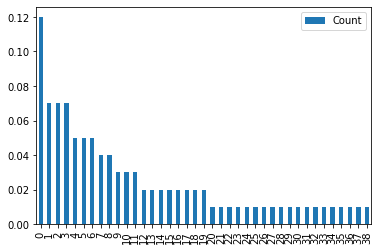

In [59]:
_df_tor.plot(kind="bar")

Let's see if there are any join venues between them

In [37]:
intersection = set(_df_ch['Category']).intersection(set(_df_tor['Category']))

In [38]:
intersection

{'American',
 'Asian',
 'BBQ',
 'Bakery',
 'Burgers',
 'Café',
 'Deli / Bodega',
 'Diner',
 'French',
 'Gastropub',
 'Italian',
 'Japanese',
 'Korean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'New American',
 'Pizza',
 'Restaurant',
 'Sandwiches',
 'Seafood',
 'Steakhouse',
 'Tapas',
 'Vegetarian / Vegan'}

In [39]:
len(intersection)

24

we can see that there are 24 joined venues between the two

Now we will cluster each of the cities venues by the magnitude of the venue in the city
We will divide the clusters into 3 centers, minimum magnitude, midium magnitude and maximum magnitude.

In [41]:
from sklearn.cluster import KMeans

# this is the chicago clusters
chicago_model = KMeans(n_clusters=3).fit(_df_ch[['Count']])
print("Chicago labels:")
print(chicago_model.labels_)

# this is the toronto clusters
toronto_model = KMeans(n_clusters=3).fit(_df_tor[['Count']])
print("\nToronto labels:")
print(toronto_model.labels_)

Chicago labels:
[2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Toronto labels:
[2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


lets check which if the venues got into each cluster

In [45]:
ch_max_cluster = [_df_ch['Category'][x] for x in range(len(chicago_model.labels_)) if chicago_model.labels_[x] == 2]
ch_mid_cluster = [_df_ch['Category'][x] for x in range(len(chicago_model.labels_)) if chicago_model.labels_[x] == 1]
ch_min_cluster = [_df_ch['Category'][x] for x in range(len(chicago_model.labels_)) if chicago_model.labels_[x] == 0]

tor_max_cluster = [_df_tor['Category'][x] for x in range(len(toronto_model.labels_)) if toronto_model.labels_[x] == 2]
tor_mid_cluster = [_df_tor['Category'][x] for x in range(len(toronto_model.labels_)) if toronto_model.labels_[x] == 1]
tor_min_cluster = [_df_tor['Category'][x] for x in range(len(toronto_model.labels_)) if toronto_model.labels_[x] == 0]

In [48]:
print("chicago first cluster", ch_max_cluster)

chicago first cluster ['Pizza', 'New American', 'Café']


In [49]:
print("toronto first cluster", tor_max_cluster)

toronto first cluster ['Café']


let's check the correlation between each cluster

In [51]:
max_correlation = set(ch_max_cluster).intersection(set(tor_max_cluster))
mid_correlation = set(ch_mid_cluster).intersection(set(tor_mid_cluster))
min_correlation = set(ch_min_cluster).intersection(set(tor_min_cluster))

In [52]:
max_correlation

{'Café'}

In [53]:
mid_correlation

{'Gastropub', 'Japanese', 'Mexican', 'Sandwiches'}

In [54]:
min_correlation

{'BBQ', 'Burgers', 'Deli / Bodega', 'French', 'Mediterranean', 'Seafood'}

as we can see, we have 3 groups with the correlation venues.

Now in order to determine the correlation percentage between those cities we will sum up the correlated venues and divide it by the number of correlations we have in all groups together. (we calculated that earlier: intersection=24)

In [58]:
divide_by = len(intersection)
corr_percentage = len(max_correlation)/divide_by + len(mid_correlation)/divide_by + len(min_correlation)/divide_by
corr_percentage

0.4583333333333333

we got similarity between Chicago and Toronto cuisines of 0.458 percentage!

### Word Cloud to visualize the similarities and dis-similarities

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Construct the similar words cloud

In [98]:
corr_words = " ".join(min_correlation) + " ".join(max_correlation) + " ".join(mid_correlation)
correlated_words = WordCloud().generate(corr_words)

constructing the difference of words from chicago side

In [115]:
ch_side_uncorr_words = set(_df_ch['Category']) - intersection
print(ch_side_uncorr_words)
ch_side_uncorr_words = " ".join(ch_side_uncorr_words)

{'Portuguese', 'Cuban', 'Fried Chicken', 'Molecular Gastronomy', 'Tacos', 'African', 'Food Court', 'Sushi', 'Hot Dogs', 'German', 'Peruvian', 'Donuts'}


constructing the difference of words from toronto side

In [116]:
tor_side_uncorr_words = set(_df_tor['Category']) - intersection
print(tor_side_uncorr_words)
tor_side_uncorr_words = " ".join(tor_side_uncorr_words)

{'Fish & Chips', 'Caribbean', 'Food Truck', 'Vietnamese', 'Thai', 'Eastern European', 'Theme Restaurant', 'Greek', 'South American', 'Soup', 'Fast Food', 'Burritos', 'Dumplings', 'Snacks', 'Indian'}


### Setting up the word clouds

In [135]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np

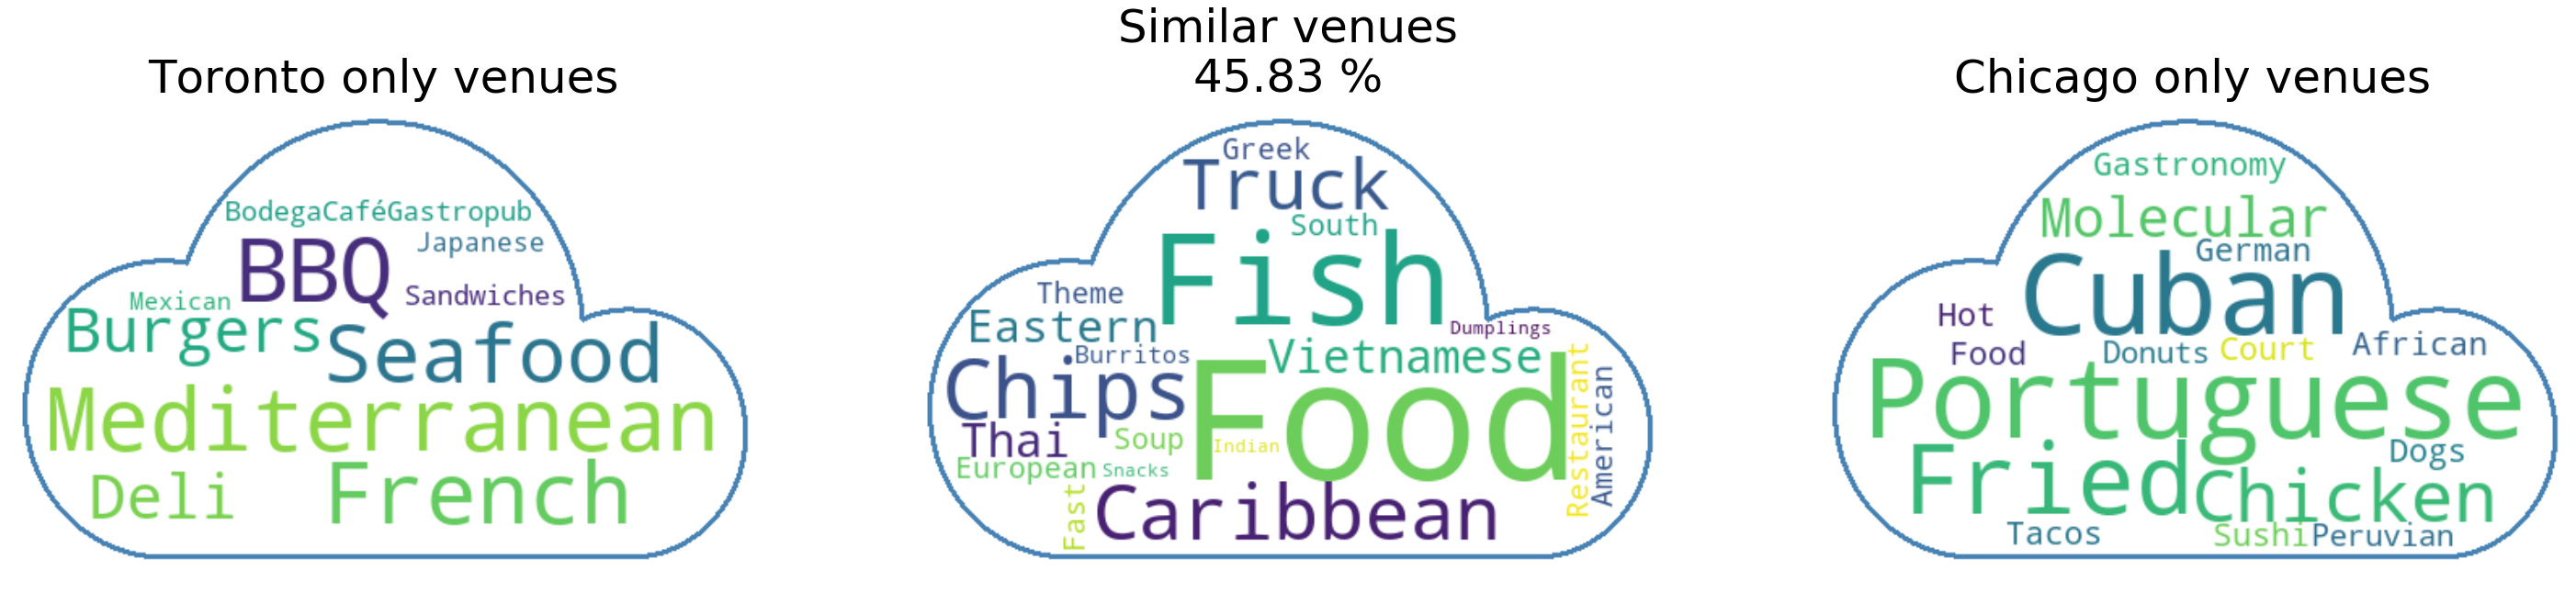

In [153]:
tor_title, sim_title, ch_title = "Toronto only venues", "Similar venues\n{}".format("{:0.2f} %".format(corr_percentage*100)), "Chicago only venues"
f, (tor_plot, sim_plot, ch_plot) = plt.subplots(1,3)
plt.rcParams["figure.figsize"] = [50,30]
custom_mask = np.array(Image.open("cloud.png"))

correlated_words_ = WordCloud(background_color="white",  mask=custom_mask, contour_width=3, contour_color='steelblue').generate(corr_words)
tor_side_words = WordCloud(background_color="white", mask=custom_mask, contour_width=3, contour_color='steelblue').generate(tor_side_uncorr_words)
ch_side_words = WordCloud(background_color="white", mask=custom_mask, contour_width=3, contour_color='steelblue').generate(ch_side_uncorr_words)

tor_plot.set_title(tor_title, fontsize=50)
sim_plot.set_title(sim_title, fontsize=50)
ch_plot.set_title(ch_title, fontsize=50)

tor_plot.imshow(correlated_words_, interpolation='bilinear')
sim_plot.imshow(tor_side_words, interpolation='bilinear')
ch_plot.imshow(ch_side_words, interpolation='bilinear')

tor_plot.axis("off")
sim_plot.axis("off")
ch_plot.axis("off")

plt.show()

## Results and Disscusion

As we can see, we have venues that are similar to both of the cities, we have seen that there are some venues that are more common in the area of the city than other.
We decided to cluster the venues into three groups in order to determine the similarity of those cities.

We checked every group and calculated the results of similarity of each group, next we divided the results of each group with the number of intersections (which we found was 24).

We can see that we have similarity between Toronto and Chicago in magnitude of 45.83, where we considered the fact that there are some venues that are less common than the other.

We decided to use word cloud in order to show the results better, we can see that we have some similiar venues like chips and caribbian food.

## Conclusion

In our project we decided to see if we can find out how similar, cuisinwise, a city can be to another when we inspect the venues of each city in order to help food enthusiastics around the world.
We have found the venues that are in each city from the Foursquare database API. When we cluster the venues into three groups we are getting three groups with the frequency in the city.
By Calulating the percentage of similairty in each group and summing up we can get a pretty good indicator for similarity between the cities.